# GRAPH THEORY

## Variant: Madrid

In [48]:
# %pip install osmnx

### Importing libraries

In [49]:
import random
import osmnx as ox
import networkx as nx
import pulp
import json
import geopandas as gpd
import folium
import osmnx as ox
from matplotlib import pyplot as plt
from shapely.geometry import shape, Point
import pandas as pd
from geopy.distance import geodesic

## UBER MOVEMENTS 

In [96]:
file_path = 'madrid_codigos_postales.json' 
with open(file_path, 'r') as file:
    data = json.load(file)

In [97]:
gdf = gpd.GeoDataFrame.from_features(data['features'])
m = folium.Map(location=[40.4168, -3.7038], zoom_start=11)
for idx, row in gdf.iterrows():
    folium.GeoJson(row.geometry).add_to(m)
m

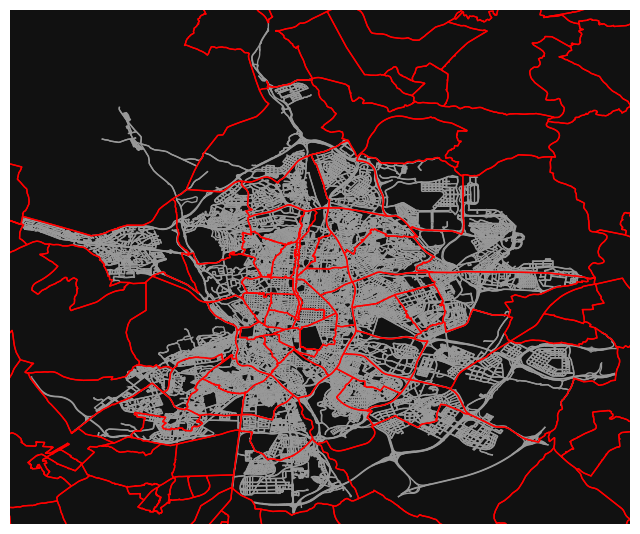

In [101]:
G_Madrid_zones = ox.graph_from_place('Madrid, Spain', network_type='drive')
fig, ax = ox.plot_graph(G_Madrid_zones, node_size=0, show=False)
gdf.plot(ax=ax, facecolor='none', edgecolor='red', alpha=1)
plt.show()

## OSMNX "driving" GRAPH FOR MADRID

In [50]:
G_Madrid = ox.graph_from_place('Madrid, Spain', network_type='drive')

In [51]:
print(G_Madrid.nodes)

[171946, 171951, 171952, 171953, 171954, 20952888, 20952890, 20952893, 20952910, 20952912, 20952914, 20952917, 20952923, 20952925, 20952926, 20952927, 20952929, 20952931, 20952942, 20952943, 20952948, 20952949, 20953196, 20953197, 20953217, 20953221, 20953226, 20953234, 20953243, 20953244, 20953247, 20953250, 20953256, 20953271, 20960687, 20960688, 20960689, 20960690, 20960693, 20960694, 20960695, 20960696, 20960705, 20960707, 20960708, 20960709, 20960713, 20960717, 20962888, 20962900, 20962903, 20962911, 20962916, 20962919, 20962932, 20962935, 20962947, 20962965, 20962984, 20963005, 20963008, 20963022, 20963025, 20963045, 20963048, 20963052, 20963054, 20963055, 20963062, 20963071, 20963078, 20963082, 20963085, 20963088, 20963091, 20963095, 20963098, 20963101, 20963107, 20963111, 20963116, 20963122, 20963126, 20963139, 20963148, 20963151, 20963161, 20963164, 20963170, 20963176, 20963179, 20963182, 20963197, 20963200, 20963202, 20963204, 20963205, 20963207, 21067873, 21067877, 21067879,

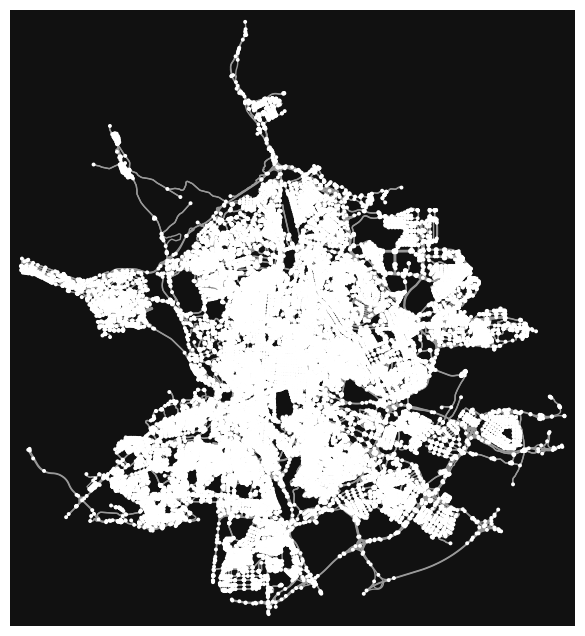

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [52]:
ox.plot_graph(G_Madrid, node_size=8)

### Retrieving number of nodes and number of edges in graph

In [53]:
print('Number of nodes: {}'.format(G_Madrid.number_of_nodes()))
print('Number of edges: {}'.format(G_Madrid.number_of_edges()))

Number of nodes: 30882
Number of edges: 61114


### Calculating network cover area  in square meters

In [54]:
G_proj = ox.project_graph(G_Madrid)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
print('Madrid cover area: {} square meters'.format(round(graph_area_m)))
print('Madrid cover area: {} square kilometers'.format(round(graph_area_m) / 1000000))

Madrid cover area: 525908642 square meters
Madrid cover area: 525.908642 square kilometers


### Retrieving basic stats about the network

In [55]:
ox.basic_stats(G_proj, area=graph_area_m)

{'n': 30882,
 'm': 61114,
 'k_avg': 3.9579042808108285,
 'edge_length_total': 6068815.363000021,
 'edge_length_avg': 99.30319342540206,
 'streets_per_node_avg': 3.083381905317013,
 'streets_per_node_counts': {0: 0,
  1: 1976,
  2: 333,
  3: 21944,
  4: 6414,
  5: 199,
  6: 16},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.06398549316754096,
  2: 0.010782980376918593,
  3: 0.7105757399132181,
  4: 0.20769380221488246,
  5: 0.006443883168188589,
  6: 0.0005181011592513439},
 'intersection_count': 28906,
 'street_length_total': 4772319.713000022,
 'street_segment_count': 47595,
 'street_length_avg': 100.26934999474781,
 'circuity_avg': 1.0492404147589938,
 'self_loop_proportion': 0.001554785166509087,
 'node_density_km': 58.72122557111133,
 'intersection_density_km': 54.963918993541355,
 'edge_density_km': 11539.676053369281,
 'street_density_km': 9074.427250972592}

### One-way vs Two-way roads distribution

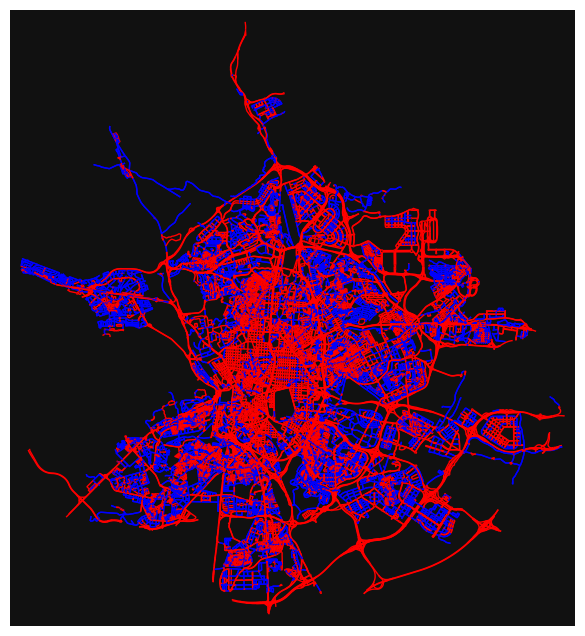

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [56]:
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G_Madrid.edges(keys=True, data=True)]
ox.plot_graph(G_Madrid, edge_color=ec,  node_size=0)

## Generating 20 random stores in Madrid + 1 central market

In [65]:
nodes = list(G_Madrid.nodes)
stores = random.sample(nodes, 20)
print(stores)
central = 171951 if 171951 in nodes else random.choice(nodes)
stores.append(central)
stores

[1377881557, 254498236, 2604982681, 26202196, 285912200, 3538151707, 308726077, 1838624715, 25552369, 430969600, 570093483, 1156936773, 3884052068, 26085371, 98766712, 2689156081, 1594900062, 364653409, 26025849, 2297581623]


[1377881557,
 254498236,
 2604982681,
 26202196,
 285912200,
 3538151707,
 308726077,
 1838624715,
 25552369,
 430969600,
 570093483,
 1156936773,
 3884052068,
 26085371,
 98766712,
 2689156081,
 1594900062,
 364653409,
 26025849,
 2297581623,
 171951]

## Distance matrix for all stores

In [66]:
distance_matrix = [[float('inf') for _ in range(len(stores))] for _ in range(len(stores))]
for i in range(len(stores)):
    for j in range(len(stores)):
        if i != j:
            distance_matrix[i][j] = nx.shortest_path_length(G_Madrid, stores[i], stores[j], weight='length', method='dijkstra')
        else:
            distance_matrix[i][j] = 0
distance_matrix

[[0,
  6841.837,
  9865.882000000001,
  5847.509999999999,
  5165.955000000001,
  4478.179,
  8325.402,
  12107.871999999996,
  2599.2999999999997,
  4455.692999999999,
  12845.244999999999,
  12810.857999999997,
  6292.758000000002,
  13277.267,
  1878.2340000000004,
  6937.775999999999,
  7913.796000000001,
  12081.866000000005,
  3082.861,
  5586.191999999999,
  3221.957],
 [7450.304999999998,
  0,
  11009.875,
  2879.2219999999998,
  6346.0380000000005,
  10339.618999999999,
  8896.659999999998,
  17291.932000000008,
  9624.958999999999,
  3947.786999999999,
  19297.527999999988,
  19754.803000000007,
  13318.417000000003,
  17835.853,
  5766.393999999999,
  12166.368999999999,
  14025.975000000006,
  12653.124,
  7444.857,
  11850.467999999999,
  10048.686000000002],
 [14643.813999999998,
  16223.829000000003,
  0,
  16330.351,
  11119.329,
  13075.138,
  8653.879000000003,
  26567.469999999998,
  15300.19299999999,
  15836.682000000003,
  26172.276999999995,
  18468.24700000001,


In [67]:
dist_m = pd.DataFrame(distance_matrix)
dist_m.to_csv("distances.txt")

In [68]:
s = [[str(e) for e in row] for row in distance_matrix]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print("\n".join(table))

0                 	6841.837          	9865.882000000001 	5847.509999999999 	5165.955000000001 	4478.179          	8325.402          	12107.871999999996	2599.2999999999997	4455.692999999999 	12845.244999999999	12810.857999999997	6292.758000000002 	13277.267         	1878.2340000000004	6937.775999999999 	7913.796000000001 	12081.866000000005	3082.861          	5586.191999999999 	3221.957          
7450.304999999998 	0                 	11009.875         	2879.2219999999998	6346.0380000000005	10339.618999999999	8896.659999999998 	17291.932000000008	9624.958999999999 	3947.786999999999 	19297.527999999988	19754.803000000007	13318.417000000003	17835.853         	5766.393999999999 	12166.368999999999	14025.975000000006	12653.124         	7444.857          	11850.467999999999	10048.686000000002
14643.813999999998	16223.829000000003	0                 	16330.351         	11119.329         	13075.138         	8653.879000000003 	26567.469999999998	15300.19299999999 	15836.682000000003	26172.276999

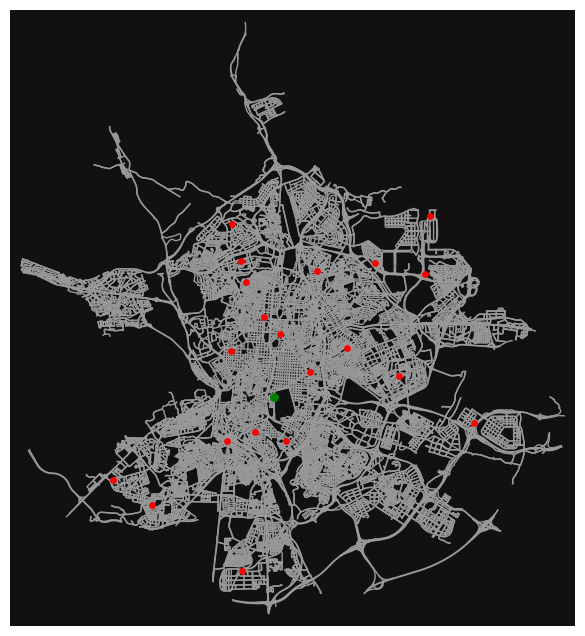

In [69]:
import matplotlib.pyplot as plt
fig, ax = ox.plot_graph(G_Madrid, node_size=0, show=False, close=False)
for store in stores:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='r', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central]['x'], G_Madrid.nodes[central]['y'], c='g', s=30, zorder=3)
plt.show()

In [ ]:
distances = {}
for i in range(len(stores)):
    for j in range(len(stores)):
        if i != j:
            distances[(stores[i], stores[j])] = nx.shortest_path_length(G_Madrid, stores[i], stores[j], weight='length', method='dijkstra')
        

In [ ]:
distances

{(316250347, 3282041454): 14096.471000000003,
 (316250347, 254996918): 15989.94700000001,
 (316250347, 1108148903): 10843.295000000004,
 (316250347, 8786311133): 19472.757,
 (316250347, 1363996506): 7602.251999999995,
 (316250347, 307171606): 4662.559,
 (316250347, 24969415): 14772.069000000009,
 (316250347, 258548775): 4391.139,
 (316250347, 305397361): 5763.317,
 (316250347, 339984193): 16084.546000000006,
 (316250347, 31041871): 10262.660000000007,
 (316250347, 60014335): 10979.016000000001,
 (316250347, 255572157): 14980.732,
 (316250347, 6385195038): 4425.498999999999,
 (316250347, 26066586): 8235.088,
 (316250347, 297605509): 12775.655999999999,
 (316250347, 306046810): 15656.107,
 (316250347, 338676733): 8247.018999999998,
 (316250347, 302684551): 3186.3889999999997,
 (316250347, 171951): 8488.462000000003,
 (3282041454, 316250347): 13893.488000000003,
 (3282041454, 254996918): 7557.794,
 (3282041454, 1108148903): 8329.379,
 (3282041454, 8786311133): 19998.594,
 (3282041454, 136

# Traveling Salesman Problem 

## Problem Description
Given a list of $n$ cities and the distances $d_{ij}$ between each pair of cities, find the shortest possible route that visits each city exactly once and returns to the original city.

### Variables:
- $x_{ij}$: Binary variable - whether the route goes from city $i$ to city $j$.
- $u_i$: Continuous variable associated with each city.

### Objective function:
Minimize $\sum_{i=1}^{n}\sum_{j=1}^{n} d_{ij} \cdot x_{ij}$

### Constraints:
- $x_{ii} = 0$ for all $i \in \{1, 2, \dots, n\}$ (No city connects to itself).

- $\sum_{j=1, j\neq i}^{n} x_{ij} = 1$ for all $i \in \{1, 2, \dots, n\}$ (Each city is left exactly once).

- $\sum_{i=1, i\neq j}^{n} x_{ij} = 1$ for all $j \in \{1, 2, \dots, n\}$ (Each city is visited exactly once).

- $u_i + x_{ij} \leq u_j + (n - 1)(1 - x_{ij})$ for all $i,j \in \{1, 2, \dots, n\}, j \neq 1$ (Subtour elimination)

- $u_1 = 0$ (Start from city 1)

In [72]:
problem = pulp.LpProblem("Traveling Salesman Problem", pulp.LpMinimize)
n = 21
nodes = range(n)
Cost = distance_matrix

x = pulp.LpVariable.dicts("x", ((i, j) for i in nodes for j in nodes), cat='Binary')
u = pulp.LpVariable.dicts("u", nodes, lowBound=0, cat='Continuous')

problem += pulp.lpSum(x[i,j] * Cost[i][j] for i in nodes for j in nodes)

for i in nodes:
    problem += x[i,i] == 0

for i in nodes:
    problem += pulp.lpSum(x[i,j] for j in nodes) == 1
 
for j in nodes:
    problem += pulp.lpSum(x[i,j] for i in nodes) == 1

for i in nodes:
    for j in nodes:
        if j != 1:
            problem += u[i] + x[i,j] <= u[j] + (n - 1) * (1 - x[i,j])
 
problem += u[1] == 0
problem.solve()

/opt/homebrew/lib/python3.11/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/f01cff66227c460996929557d09aea71-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/f01cff66227c460996929557d09aea71-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 489 COLUMNS
At line 3936 RHS
At line 4421 BOUNDS
At line 4863 ENDATA
Problem MODEL has 484 rows, 462 columns and 2124 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 82534 - 0.00 seconds
Cgl0002I 21 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 20 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 20 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 20 strengthened rows, 0 substitutions
Cgl0003I 0 

1

## Resulting edges

In [73]:
list_routes = []
for i in nodes:
    for j in nodes:
        if pulp.value(x[i,j]) > 0:
            print(i, "->", j)
            list_routes.append([stores[i],stores[j]])
list_routes

0 -> 18
1 -> 3
2 -> 17
3 -> 9
4 -> 1
5 -> 11
6 -> 4
7 -> 10
8 -> 5
9 -> 14
10 -> 19
11 -> 16
12 -> 20
13 -> 7
14 -> 0
15 -> 13
16 -> 2
17 -> 6
18 -> 15
19 -> 12
20 -> 8


[[1377881557, 26025849],
 [254498236, 26202196],
 [2604982681, 364653409],
 [26202196, 430969600],
 [285912200, 254498236],
 [3538151707, 1156936773],
 [308726077, 285912200],
 [1838624715, 570093483],
 [25552369, 3538151707],
 [430969600, 98766712],
 [570093483, 2297581623],
 [1156936773, 1594900062],
 [3884052068, 171951],
 [26085371, 1838624715],
 [98766712, 1377881557],
 [2689156081, 26085371],
 [1594900062, 2604982681],
 [364653409, 308726077],
 [26025849, 2689156081],
 [2297581623, 3884052068],
 [171951, 25552369]]

## Sorting resulting edges to get the complete route 

In [74]:
pairs = list_routes
sorted_pairs = [pairs[0]]

for _ in range(len(pairs) - 1):
    last_element = sorted_pairs[-1][1]
    for pair in pairs:
        if pair[0] == last_element:
            sorted_pairs.append(pair)
            break

optimal_route = sorted_pairs
optimal_route

[[1377881557, 26025849],
 [26025849, 2689156081],
 [2689156081, 26085371],
 [26085371, 1838624715],
 [1838624715, 570093483],
 [570093483, 2297581623],
 [2297581623, 3884052068],
 [3884052068, 171951],
 [171951, 25552369],
 [25552369, 3538151707],
 [3538151707, 1156936773],
 [1156936773, 1594900062],
 [1594900062, 2604982681],
 [2604982681, 364653409],
 [364653409, 308726077],
 [308726077, 285912200],
 [285912200, 254498236],
 [254498236, 26202196],
 [26202196, 430969600],
 [430969600, 98766712],
 [98766712, 1377881557]]

Resulting route in cyclic. 

To start with central point:

In [75]:
for i in range(len(optimal_route)):
    if optimal_route[i][0] == 171951:
        start_position = i
        break
optimal_route = optimal_route[start_position:] + optimal_route[:start_position]
optimal_route

[[171951, 25552369],
 [25552369, 3538151707],
 [3538151707, 1156936773],
 [1156936773, 1594900062],
 [1594900062, 2604982681],
 [2604982681, 364653409],
 [364653409, 308726077],
 [308726077, 285912200],
 [285912200, 254498236],
 [254498236, 26202196],
 [26202196, 430969600],
 [430969600, 98766712],
 [98766712, 1377881557],
 [1377881557, 26025849],
 [26025849, 2689156081],
 [2689156081, 26085371],
 [26085371, 1838624715],
 [1838624715, 570093483],
 [570093483, 2297581623],
 [2297581623, 3884052068],
 [3884052068, 171951]]

In [76]:
general_route = []
for route in optimal_route:
    route_bellman_ford = nx.shortest_path(G_Madrid, route[0], route[1], weight='length')
    general_route += route_bellman_ford    

for i in range(len(general_route)):
    if i < len(general_route) - 1:
        if general_route[i] == general_route[i+1]:
            general_route.pop(i)

## Resulting route

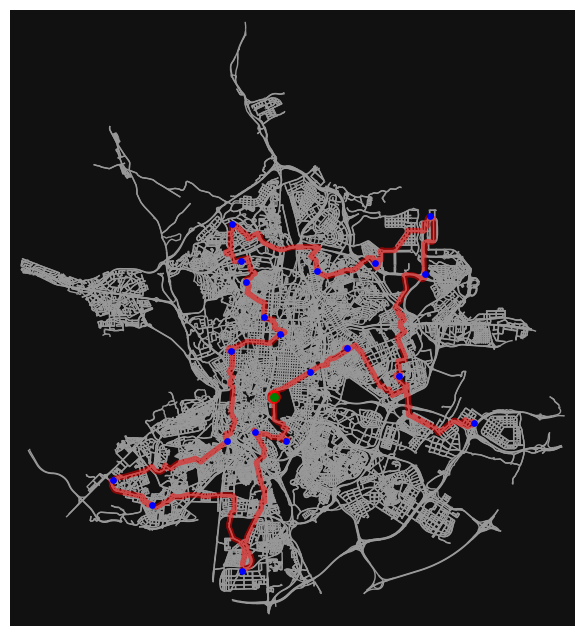

In [94]:
fig, ax = ox.plot_graph_route(G_Madrid, general_route, node_size=0, show=False, close=False)
for store in stores:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='b', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central]['x'], G_Madrid.nodes[central]['y'], c='g', s=30, zorder=3)
plt.show()

# Calculating the time spent

## Stores and zones

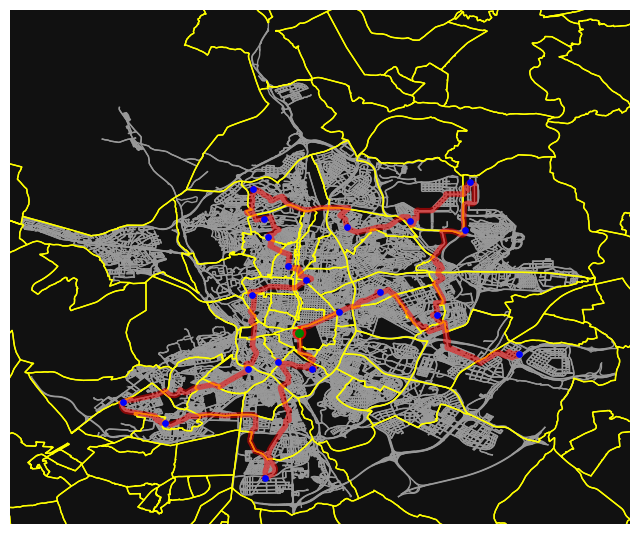

In [106]:

fig, ax = ox.plot_graph(G_Madrid_zones, node_size=0, show=False)
ox.plot_graph_route(G_Madrid, general_route, node_size=0, ax=ax, show=False, close=False)

for store in stores:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='b', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central]['x'], G_Madrid.nodes[central]['y'], c='g', s=30, zorder=3)
gdf.plot(ax=ax, facecolor='none', edgecolor='yellow', alpha=1)
plt.show()

## Getting data from "madrid_codigos_postales.json" 

In [113]:
with open('madrid_codigos_postales.json', 'r') as f:
    zones_data = json.load(f)

zones = {}
for feature in zones_data['features']:
    zone_code = feature['properties']['MOVEMENT_ID']
    zone_polygon = shape(feature['geometry'])
    zones[zone_code] = zone_polygon

store_coordinates = {}
for store in stores:
    x = G_Madrid.nodes[store]['x']
    y = G_Madrid.nodes[store]['y']
    store_coordinates[store] = (x, y)

stores_in_zones = {}
for store_id, coordinates in store_coordinates.items():
    point = Point(coordinates)
    for zone_code, zone_polygon in zones.items():
        if zone_polygon.contains(point):
            if zone_code not in stores_in_zones:
                stores_in_zones[zone_code] = []
            stores_in_zones[zone_code].append(store_id)
            break

for zone_code, stores_in_zone in stores_in_zones.items():
    print(f"Zone {zone_code}: {stores_in_zone}")

Zone 2: [1377881557]
Zone 34: [254498236]
Zone 42: [2604982681, 364653409]
Zone 29: [26202196, 430969600]
Zone 33: [285912200]
Zone 27: [3538151707]
Zone 55: [308726077]
Zone 54: [1838624715]
Zone 28: [25552369]
Zone 21: [570093483]
Zone 52: [1156936773]
Zone 45: [3884052068]
Zone 44: [26085371]
Zone 20: [98766712]
Zone 19: [2689156081]
Zone 37: [1594900062]
Zone 15: [26025849]
Zone 12: [2297581623]
Zone 14: [171951]


## Where each store is located

In [115]:
list_stores_zones = dict()
for zone_code, stores_in_zone in stores_in_zones.items():
    for store in stores_in_zone:
        list_stores_zones[store] = zone_code
list_stores_zones

{1377881557: '2',
 254498236: '34',
 2604982681: '42',
 364653409: '42',
 26202196: '29',
 430969600: '29',
 285912200: '33',
 3538151707: '27',
 308726077: '55',
 1838624715: '54',
 25552369: '28',
 570093483: '21',
 1156936773: '52',
 3884052068: '45',
 26085371: '44',
 98766712: '20',
 2689156081: '19',
 1594900062: '37',
 26025849: '15',
 2297581623: '12',
 171951: '14'}

## In which zones are nodes and edges of optimal route

In [119]:
general_route_zones =[]
for i in range(len(optimal_route)):
    source = optimal_route[i][0]
    destination = optimal_route[i][1]
    general_route_zones.append((list_stores_zones[source], list_stores_zones[destination]))
    
general_route_zones

[('14', '28'),
 ('28', '27'),
 ('27', '52'),
 ('52', '37'),
 ('37', '42'),
 ('42', '42'),
 ('42', '55'),
 ('55', '33'),
 ('33', '34'),
 ('34', '29'),
 ('29', '29'),
 ('29', '20'),
 ('20', '2'),
 ('2', '15'),
 ('15', '19'),
 ('19', '44'),
 ('44', '54'),
 ('54', '21'),
 ('21', '12'),
 ('12', '45'),
 ('45', '14')]

## Calculating average speed between zones

In [122]:
speeds = pd.read_csv('madrid-codigos_postales-2020-1-All-HourlyAggregate.csv')
print(speeds.iloc[:5])

   sourceid  dstid  hod  mean_travel_time  standard_deviation_travel_time  \
0       248     13   18           1585.43                          526.39   
1       185     34   22            693.11                          199.11   
2       271    273   11            490.13                          243.77   
3       272    263   11            796.95                          376.81   
4       248      1    1           1252.83                          117.53   

   geometric_mean_travel_time  geometric_standard_deviation_travel_time  
0                     1516.28                                      1.33  
1                      669.04                                      1.29  
2                      440.94                                      1.58  
3                      722.58                                      1.54  
4                     1247.39                                      1.10  


In [130]:
print(speeds.iloc[2])

sourceid                                    271.00
dstid                                       273.00
hod                                          11.00
mean_travel_time                            490.13
standard_deviation_travel_time              243.77
geometric_mean_travel_time                  440.94
geometric_standard_deviation_travel_time      1.58
Name: 2, dtype: float64


In [136]:
import csv
rows_list = []
file_path = 'madrid-codigos_postales-2020-1-All-HourlyAggregate.csv'
with open(file_path, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        rows_list.append(row)

['sourceid', 'dstid', 'hod', 'mean_travel_time', 'standard_deviation_travel_time', 'geometric_mean_travel_time', 'geometric_standard_deviation_travel_time']
['248', '13', '18', '1585.43', '526.39', '1516.28', '1.33']
['185', '34', '22', '693.11', '199.11', '669.04', '1.29']
['271', '273', '11', '490.13', '243.77', '440.94', '1.58']
['272', '263', '11', '796.95', '376.81', '722.58', '1.54']


In [200]:
def find_row(rows_list, indices, values):
    found_rows = []
    for row in rows_list:
        if all(row[idx] == val for idx, val in zip(indices, values)):
            found_rows.append(row)
    return sorted(found_rows, key=lambda x: int(x[2]))

target_indices = [0, 1] 

speeds_for_route = [['sourceid', 'dstid', 'hod', 'mean_travel_time']]
for i in range(len(general_route_zones)):
    source = general_route_zones[i][0]
    destination = general_route_zones[i][1] 
    matching_rows = find_row(rows_list, target_indices, [str(source), str(destination)])
    for row in matching_rows:
        row[0] = int(row[0])
        row[1] = int(row[1])
        row[2] = int(row[2])
        speeds_for_route.append(row[:4])

speeds_for_route = pd.DataFrame(speeds_for_route[1:], columns=speeds_for_route[0])
speeds_for_route.to_csv("speeds_for_route.csv")

## DataFrame with times in road between centres of zones 

In [201]:
speeds_for_route

sourceid  dstid  hod mean_travel_time
0          14     28    0           552.58
1          14     28    1           570.39
2          14     28    2           559.02
3          14     28    3           530.69
4          14     28    4           532.28
..        ...    ...  ...              ...
449        45     14   19           345.24
450        45     14   20           330.48
451        45     14   21           293.94
452        45     14   22           270.02
453        45     14   23           276.98

[454 rows x 4 columns]

## Finding locations of centres of zones

In [162]:
import json
from shapely.geometry import Polygon
with open('madrid_codigos_postales.json', 'r') as file:
    geojson_data = json.load(file)
list_of_centres = []
for feature in geojson_data['features']:
    try:
        polygon_coords = feature['geometry']['coordinates'][0]
        polygon = Polygon(polygon_coords)
        centroid = polygon.centroid
        center_coords = centroid.x, centroid.y
        center_c = ox.nearest_nodes(G_Madrid, centroid.x, centroid.y)
        list_of_centres.append((center_c))
    except:
        continue
list_of_centres

[25552423,
 143755802,
 33131380,
 25906297,
 1504976877,
 143500436,
 150987792,
 2601286044,
 1957490858,
 141887738,
 1175067581,
 26310539,
 345198395,
 26486624,
 25935134,
 102518454,
 101044604,
 307644818,
 302000362,
 264208242,
 315274929,
 31221572,
 264338169,
 307997220,
 301999574,
 315749486,
 100962502,
 25531678,
 26204784,
 306102626,
 316773736,
 1838819849,
 254968465,
 77919823,
 43494610,
 102359166,
 24969395,
 4573249413,
 93876097,
 330271561,
 315894604,
 255968715,
 221254528,
 747482570,
 162069203,
 98987563,
 1094644004,
 259057658,
 21702379,
 24977027,
 296504808,
 443154219,
 307706711,
 1420240558,
 1433108756,
 32014661,
 2281943567,
 2281943552,
 364653589,
 2281943567,
 387703059,
 364653589,
 2281943567,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 319165153,
 319165153,
 319165153,
 319165153,
 319165150,
 1275932145,
 266158546,
 319165153,
 266158546,
 319165150,
 319165

## Distances between centres

In [195]:
general_route_zones_distances = []
for i in range(len(general_route_zones)):
    source_i = int(general_route_zones[i][0])
    destination_i = int(general_route_zones[i][1])
    source = list_of_centres[source_i]
    destination = list_of_centres[destination_i]
    try:
        path_l = nx.shortest_path_length(G_Madrid, int(source), int(destination), weight='length', method='dijkstra')
    except:
        connected_nodes_d = list(G_Madrid.neighbors(destination))
        connected_nodes_s = list(G_Madrid.neighbors(source))
        for node in connected_nodes_d:
            try:
                path_l = nx.shortest_path_length(G_Madrid, int(source), int(node), weight='length', method='dijkstra')
                path_l += nx.shortest_path_length(G_Madrid, int(node), int(destination), weight='length', method='dijkstra')
                break
            except:
                continue
    if path_l == 0:
        path_l = 0
    general_route_zones_distances.append([source_i, destination_i, path_l])
    
general_route_zones_distances = pd.DataFrame(general_route_zones_distances, columns=['sourceid', 'dstid', 'length'])
general_route_zones_distances

sourceid  dstid     length
0         14     28   6246.362
1         28     27   7024.092
2         27     52   7685.449
3         52     37   3961.032
4         37     42   9841.966
5         42     42      0.000
6         42     55  15647.950
7         55     33   9100.837
8         33     34   5335.198
9         34     29  13464.116
10        29     29      0.000
11        29     20  11168.905
12        20      2  12618.266
13         2     15   4122.022
14        15     19   2764.887
15        19     44   8077.778
16        44     54  17042.277
17        54     21   9695.511
18        21     12   9695.511
19        12     45   6188.966
20        45     14   4922.619

## Calculating average speed with:
### - distances between centres 
### - time needed

In [217]:
g_r = general_route_zones_distances.copy()
s_r = speeds_for_route.copy()
g_r[['sourceid', 'dstid']] = g_r[['sourceid', 'dstid']].astype(int)

merged_data = s_r.merge(g_r, left_on=['sourceid', 'dstid'], right_on=['sourceid', 'dstid'], how='left')
s_r['length'] = merged_data['length'].astype(float)
s_r['mean_travel_time'] = merged_data['mean_travel_time'].astype(float)
s_r['speed'] = s_r['length'] / s_r['mean_travel_time']

s_r.to_csv("speeds.csv")


In [218]:
s_r

sourceid  dstid  hod  mean_travel_time    length      speed
0          14     28    0            552.58  6246.362  11.303996
1          14     28    1            570.39  6246.362  10.951037
2          14     28    2            559.02  6246.362  11.173772
3          14     28    3            530.69  6246.362  11.770265
4          14     28    4            532.28  6246.362  11.735106
..        ...    ...  ...               ...       ...        ...
449        45     14   19            345.24  4922.619  14.258542
450        45     14   20            330.48  4922.619  14.895361
451        45     14   21            293.94  4922.619  16.747020
452        45     14   22            270.02  4922.619  18.230572
453        45     14   23            276.98  4922.619  17.772471

[454 rows x 6 columns]

### - Zones in the route
### - Nodes in the route
### - Distances

In [223]:
print(general_route_zones)
print(optimal_route)
optimal_route_distances = []
for i in range(len(optimal_route)):
    source = optimal_route[i][0]
    destination = optimal_route[i][1]
    path_l = nx.shortest_path_length(G_Madrid, source, destination, weight='length', method='dijkstra')
    optimal_route_distances.append(path_l)
print(optimal_route_distances)

[('14', '28'), ('28', '27'), ('27', '52'), ('52', '37'), ('37', '42'), ('42', '42'), ('42', '55'), ('55', '33'), ('33', '34'), ('34', '29'), ('29', '29'), ('29', '20'), ('20', '2'), ('2', '15'), ('15', '19'), ('19', '44'), ('44', '54'), ('54', '21'), ('21', '12'), ('12', '45'), ('45', '14')]
[[171951, 25552369], [25552369, 3538151707], [3538151707, 1156936773], [1156936773, 1594900062], [1594900062, 2604982681], [2604982681, 364653409], [364653409, 308726077], [308726077, 285912200], [285912200, 254498236], [254498236, 26202196], [26202196, 430969600], [430969600, 98766712], [98766712, 1377881557], [1377881557, 26025849], [26025849, 2689156081], [2689156081, 26085371], [26085371, 1838624715], [1838624715, 570093483], [570093483, 2297581623], [2297581623, 3884052068], [3884052068, 171951]]
[2268.143, 2432.0769999999993, 10352.493, 6269.773000000001, 8048.367, 3353.1600000000008, 5350.396, 3510.5629999999996, 6679.090000000003, 2879.2219999999998, 2023.7500000000002, 2594.526, 1942.887, 

## Times, when the courier visits all of the nodes in the route

In [280]:
time = 9
road_time = 0
print(len(general_route_zones) == len(optimal_route_distances) == len(optimal_route))
n = len(general_route_zones)
for i in range(n):
    source = general_route_zones[i][0]
    destination = general_route_zones[i][1]
    if source == destination:
        road_time += 0
    else:
        distance = optimal_route_distances[i]/1000
        print("Source zone:", source, " ", "Distance zone:", destination)
        try:
            filtered = s_r.loc[(s_r['sourceid'] == int(source)) & (s_r['dstid'] == int(destination)) & (s_r['hod'] == int(time))]
            sp = filtered['speed'].values[0] if not filtered.empty else None
        except:
            sp = s_r[s_r['sourceid'] == int(source)][s_r['dstid'] == int(destination)][s_r['hod'] == 23]['speed'].values[0]
        print("Speed", sp, " ", "Distance", distance )
        t = distance / sp
        print("Time (hour)", t)
        print(round(60*t), "minutes")
        
        road_time += round(60*t)
        time += t
        cur_t = round(time, 2)
        minutes = round((cur_t - int(cur_t))*60)
        if minutes == 0:
            minutes = "00"
        print("Time", int(cur_t), ":", minutes)
        print(f"Source: {source}, Destination: {destination}, Speed: {sp}, Road time: {round(road_time/60, 2)} hours")
        print("-------------------------------------------------------------------")
        

True
Source zone: 14   Distance zone: 28
Speed 8.93614020028612   Distance 2.2681430000000002
Time (hour) 0.2538168548348624
15 minutes
Time 9 : 15
Source: 14, Destination: 28, Speed: 8.93614020028612, Road time: 0.25 hours
-------------------------------------------------------------------
Source zone: 28   Distance zone: 27
Speed 36.9203258869908   Distance 2.432076999999999
Time (hour) 0.0658736601471051
4 minutes
Time 9 : 19
Source: 28, Destination: 27, Speed: 36.9203258869908, Road time: 0.32 hours
-------------------------------------------------------------------
Source zone: 27   Distance zone: 52
Speed 11.092194784014314   Distance 10.352493
Time (hour) 0.9333133073825619
56 minutes
Time 10 : 15
Source: 27, Destination: 52, Speed: 11.092194784014314, Road time: 1.25 hours
-------------------------------------------------------------------
Source zone: 52   Distance zone: 37
Speed 4.736999964122986   Distance 6.269773000000001
Time (hour) 1.3235746353147364
79 minutes
Time 11 :

## General data

In [282]:
print("Start time:", 9, ": 00")
print("End Time", int(cur_t), ":", minutes)
print("Total road time:", round(road_time/60, 2), "hours")

Start time: 9 : 00
End Time 16 : 24
Total road time: 7.38 hours


# Generating 20 more stores

In [295]:
nodes = list(G_Madrid.nodes)
for store in stores:
    nodes.remove(store)
stores2 = random.sample(nodes, 20)
print(stores2)
all_stores = stores2 + stores[:-1]
print(len(all_stores))
for store in stores2:
    nodes.remove(store)

[4011769549, 303149012, 302687964, 256155004, 311839773, 819450330, 8712134559, 60030277, 31035711, 27516704, 381229300, 1155636075, 262519295, 306043161, 59609603, 306094341, 21991324, 1156807059, 31010887, 9372946343]
40


## Calculating minimal distance from the city center to second warehouse

In [298]:
nods = G_Madrid.nodes(data=True)
lats = [data['y'] for _, data in nods]
lons = [data['x'] for _, data in nods]

max_lat, min_lat = max(lats), min(lats)
max_lon, min_lon = max(lons), min(lons)

print(f"Max Latitude: {max_lat}, Min Latitude: {min_lat}")
print(f"Max Longitude: {max_lon}, Min Longitude: {min_lon}")

Max Latitude: 40.5843672, Min Latitude: 40.3206942
Max Longitude: -3.5189556, Min Longitude: -3.8370029


## Minimal distance:

In [305]:
max_coords = (max_lat, max_lon)
min_coords = (min_lat, min_lon)
distance = geodesic(max_coords, min_coords).kilometers
print(f"The distance between the maximum and minimum coordinates is approximately: {distance:.2f} kilometers")

diameter = distance
min_dist_from_center = round(diameter / 3 , 2)
min_dist_from_center


The distance between the maximum and minimum coordinates is approximately: 39.81 kilometers


13.27

## Generating second warehouse

(-3.798480698374936, 40.203140778820554)
-3.5703979 40.448922
13.574387499612998


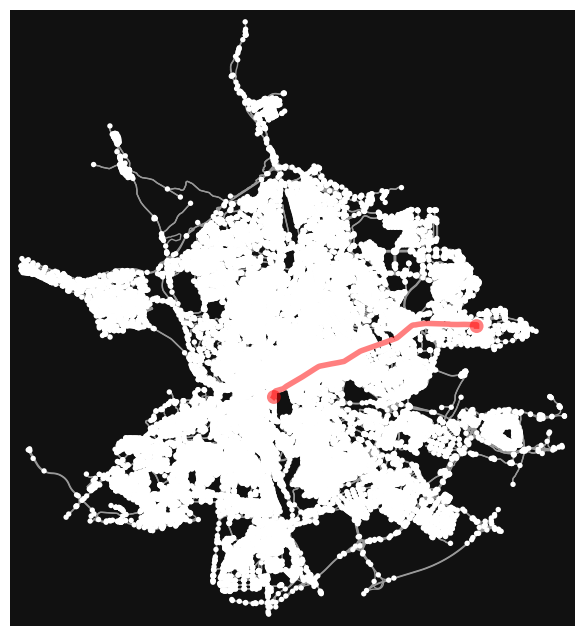

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [321]:
dist_from_center = 0
print(center_coords)
while dist_from_center < min_dist_from_center:
    central2 = random.choice(nodes)
    long, lat = nods[central2]['x'], nods[central2]['y']
    long1, lat1 = nods[central]['x'], nods[central]['y']
    print(long, lat)
    dist_from_center = geodesic((long1, lat1), (long, lat)).kilometers
    print(dist_from_center)
route_check = nx.shortest_path(G_Madrid, central, central2, weight='length')
ox.plot_graph_route(G_Madrid, route_check)
    

In [323]:
central1 = central
central2 = central2
stores = all_stores

print(central1)
print(central2)
print(stores)
print(len(stores))

171951
1313229645
[4011769549, 303149012, 302687964, 256155004, 311839773, 819450330, 8712134559, 60030277, 31035711, 27516704, 381229300, 1155636075, 262519295, 306043161, 59609603, 306094341, 21991324, 1156807059, 31010887, 9372946343, 1377881557, 254498236, 2604982681, 26202196, 285912200, 3538151707, 308726077, 1838624715, 25552369, 430969600, 570093483, 1156936773, 3884052068, 26085371, 98766712, 2689156081, 1594900062, 364653409, 26025849, 2297581623]
40


## All stores(red) and 2 warehouses(green)

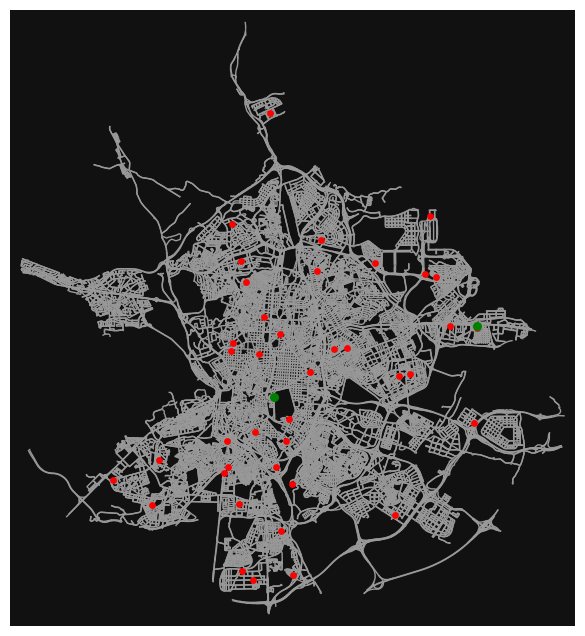

In [324]:
fig, ax = ox.plot_graph(G_Madrid, node_size=0, show=False, close=False)

for store in stores:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='r', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central1]['x'], G_Madrid.nodes[central1]['y'], c='g', s=30, zorder=3)
ax.scatter(G_Madrid.nodes[central2]['x'], G_Madrid.nodes[central2]['y'], c='g', s=30, zorder=3)
plt.show()

## To solve the TSP for 2 starting points, one of the possible option is to make 2 groups of all stores based on locations of warehouses

## KMeans

- Choose the number of clusters to create (in this case, num_clusters is 2).
- Gather the positions of nodes representing stores in a graph.


\begin{align*}
    & \text{Number of clusters:} \quad \text{num\_clusters} = 2 \\
    & \text{Node positions:} \quad \{node: (x, y) \text{ for each node in the graph}\} 
\end{align*}



# Generated clusters:

In [327]:
from sklearn.cluster import KMeans
import numpy as np

node_positions = {node: (G_Madrid.nodes[node]['x'], G_Madrid.nodes[node]['y']) for node in G_Madrid.nodes()}
coords = np.array([node_positions[node] for node in stores])
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(coords)
labels = kmeans.labels_
nodes_per_cluster = len(stores) // num_clusters
clusters = [[] for _ in range(num_clusters)]

for node, label in zip(stores, labels):
    if len(clusters[label]) < nodes_per_cluster:
        clusters[label].append(node)
    else:
        other_label = 1 - label 
        clusters[other_label].append(node)

for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {cluster}")


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: [4011769549, 303149012, 302687964, 819450330, 8712134559, 60030277, 27516704, 381229300, 1155636075, 306043161, 306094341, 1156807059, 31010887, 1838624715, 570093483, 3884052068, 26085371, 2689156081, 26025849, 2297581623]
Cluster 2: [256155004, 311839773, 31035711, 262519295, 59609603, 21991324, 9372946343, 1377881557, 254498236, 2604982681, 26202196, 285912200, 3538151707, 308726077, 25552369, 430969600, 1156936773, 98766712, 1594900062, 364653409]


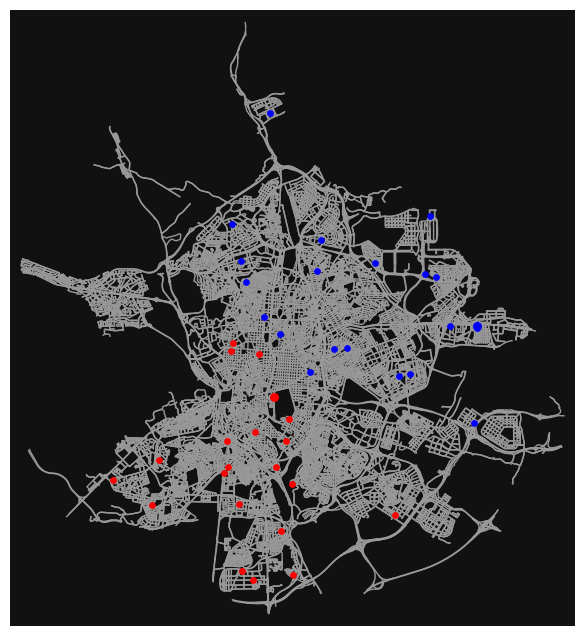

In [328]:
cluster1 = clusters[0]
cluster2 = clusters[1]
fig, ax = ox.plot_graph(G_Madrid, node_size=0, show=False, close=False)
for store in cluster1:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='r', s=15, zorder=3)
for store in cluster2:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='b', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central1]['x'], G_Madrid.nodes[central1]['y'], c='r', s=30, zorder=3)
ax.scatter(G_Madrid.nodes[central2]['x'], G_Madrid.nodes[central2]['y'], c='b', s=30, zorder=3)
plt.show()

In [19]:
def create_distance_matrix(G, stores):
    distance_matrix = [[float('inf') for _ in range(len(stores))] for _ in range(len(stores))]
    for i in range(len(stores)):
        for j in range(len(stores)):
            if i != j:
                distance_matrix[i][j] = nx.shortest_path_length(G, stores[i], stores[j], weight='length', method='dijkstra')
            else:
                distance_matrix[i][j] = 0
    return distance_matrix

In [340]:
cluster1.append(central1)
cluster2.append(central2)
print(len(cluster1))
print(len(cluster2))

21
21


# Solving TSP for 2 clusters:

## Route, Time and Distance for the first cluster:

In [362]:
distance_matrix1 = create_distance_matrix(G_Madrid, cluster1)

/opt/homebrew/lib/python3.11/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/323dd7ee74454924a7fa0d0a45c05a97-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/323dd7ee74454924a7fa0d0a45c05a97-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 489 COLUMNS
At line 3936 RHS
At line 4421 BOUNDS
At line 4863 ENDATA
Problem MODEL has 484 rows, 462 columns and 2124 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 55359.7 - 0.00 seconds
Cgl0002I 21 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 20 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 19 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 19 strengthened rows, 0 substitutions
Cgl0003I 

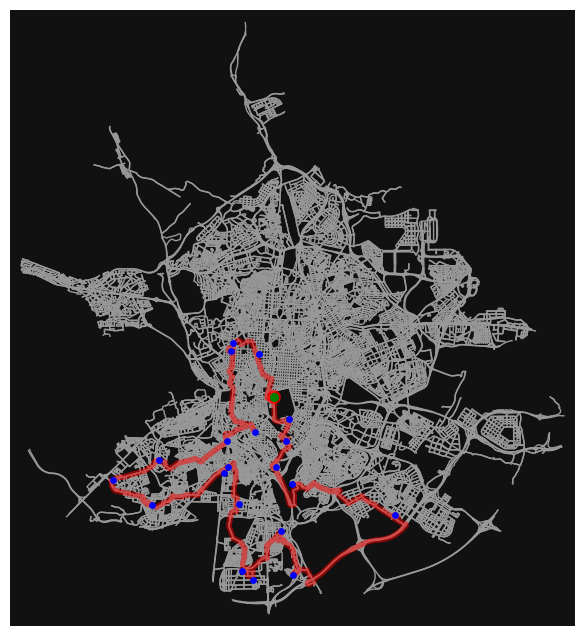

In [369]:
problem = pulp.LpProblem("Traveling Salesman Problem CL1", pulp.LpMinimize)

n = len(distance_matrix1)
nodes = range(n)
Cost = distance_matrix1

x = pulp.LpVariable.dicts("x", ((i, j) for i in nodes for j in nodes), cat='Binary')
u = pulp.LpVariable.dicts("u", nodes, lowBound=0, cat='Continuous')

problem += pulp.lpSum(x[i,j] * Cost[i][j] for i in nodes for j in nodes)

for i in nodes:
    problem += x[i,i] == 0

for i in nodes:
    problem += pulp.lpSum(x[i,j] for j in nodes) == 1

for j in nodes:
    problem += pulp.lpSum(x[i,j] for i in nodes) == 1

for i in nodes:
    for j in nodes:
        if j != 1:
            problem += u[i] + x[i,j] <= u[j] + (n - 1) * (1 - x[i,j])

problem += u[1] == 0
problem.solve()

list_routes = []
for i in nodes:
    for j in nodes:
        if pulp.value(x[i,j]) > 0:
            print(i, "->", j)
            list_routes.append([cluster1[i],cluster1[j]])

pairs = list_routes
sorted_pairs = [pairs[0]]

for _ in range(len(pairs) - 1):
    last_element = sorted_pairs[-1][1]
    for pair in pairs:
        if pair[0] == last_element:
            sorted_pairs.append(pair)
            break

optimal_route = sorted_pairs

for i in range(len(optimal_route)):
    if optimal_route[i][0] == 171951:
        start_position = i
        break

optimal_route = optimal_route[start_position:] + optimal_route[:start_position]

print(optimal_route)
general_l = 0
for i in range(len(optimal_route)):
    source = optimal_route[i][0]
    destination = optimal_route[i][1]
    path_l = nx.shortest_path_length(G_Madrid, source, destination, weight='length', method='dijkstra')
    general_l += path_l
    
print("Total Distance:", general_l/1000, "km")
print("Total time with average speed 30 km/h:", round(general_l/1000/30, 2), "hours")

general_route = []
for route in optimal_route:
    route_d = nx.shortest_path(G_Madrid, route[0], route[1], weight='length')
    general_route += route_d   

for i in range(len(general_route)):
    if i < len(general_route) - 1:
        if general_route[i] == general_route[i+1]:
            general_route.pop(i)

general_route1 = general_route
fig, ax = ox.plot_graph_route(G_Madrid, general_route1, node_size=0, show=False, close=False)
for store in cluster1:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='b', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central1]['x'], G_Madrid.nodes[central1]['y'], c='g', s=30, zorder=3)
plt.show()



## Route, Time and Distance for the second cluster:

/opt/homebrew/lib/python3.11/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/186b970853c44631a95f011c7269cd1c-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/186b970853c44631a95f011c7269cd1c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 489 COLUMNS
At line 3936 RHS
At line 4421 BOUNDS
At line 4863 ENDATA
Problem MODEL has 484 rows, 462 columns and 2124 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 70590.5 - 0.00 seconds
Cgl0002I 21 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 20 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 20 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 20 strengthened rows, 0 substitutions
Cgl0003I 

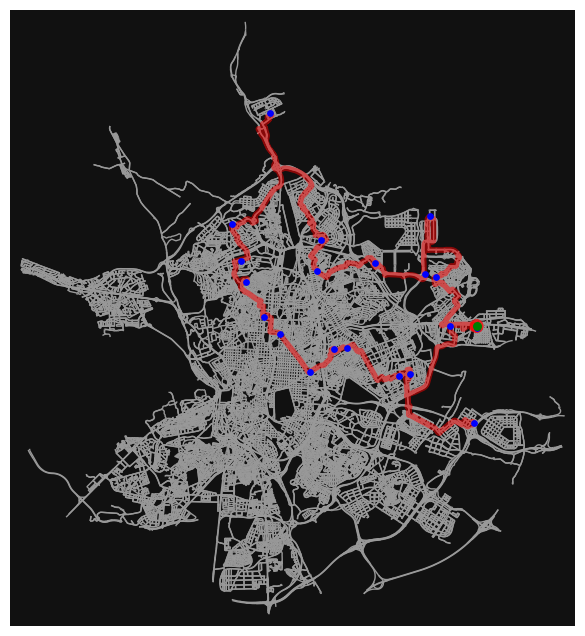

In [370]:
problem = pulp.LpProblem("Traveling Salesman Problem CL1", pulp.LpMinimize)
distance_matrix2 = create_distance_matrix(G_Madrid, cluster2)
n = len(distance_matrix2)
nodes = range(n)
Cost = distance_matrix2

x = pulp.LpVariable.dicts("x", ((i, j) for i in nodes for j in nodes), cat='Binary')
u = pulp.LpVariable.dicts("u", nodes, lowBound=0, cat='Continuous')

problem += pulp.lpSum(x[i,j] * Cost[i][j] for i in nodes for j in nodes)

for i in nodes:
    problem += x[i,i] == 0

for i in nodes:
    problem += pulp.lpSum(x[i,j] for j in nodes) == 1

for j in nodes:
    problem += pulp.lpSum(x[i,j] for i in nodes) == 1

for i in nodes:
    for j in nodes:
        if j != 1:
            problem += u[i] + x[i,j] <= u[j] + (n - 1) * (1 - x[i,j])

problem += u[1] == 0
problem.solve()

list_routes = []
for i in nodes:
    for j in nodes:
        if pulp.value(x[i,j]) > 0:
            print(i, "->", j)
            list_routes.append([cluster2[i],cluster2[j]])

pairs = list_routes
sorted_pairs = [pairs[0]]

for _ in range(len(pairs) - 1):
    last_element = sorted_pairs[-1][1]
    for pair in pairs:
        if pair[0] == last_element:
            sorted_pairs.append(pair)
            break

optimal_route = sorted_pairs

for i in range(len(optimal_route)):
    if optimal_route[i][0] == cluster2[-1]:
        start_position = i
        break

optimal_route = optimal_route[start_position:] + optimal_route[:start_position]

print(optimal_route)
general_l = 0
for i in range(len(optimal_route)):
    source = optimal_route[i][0]
    destination = optimal_route[i][1]
    path_l = nx.shortest_path_length(G_Madrid, source, destination, weight='length', method='dijkstra')
    general_l += path_l
    
print("Total Distance:", general_l/1000, "km")
print("Total time with average speed 30 km/h:", round(general_l/1000/30, 2), "hours")

general_route = []
for route in optimal_route:
    route_d = nx.shortest_path(G_Madrid, route[0], route[1], weight='length')
    general_route += route_d   

for i in range(len(general_route)):
    if i < len(general_route) - 1:
        if general_route[i] == general_route[i+1]:
            general_route.pop(i)
general_route2 = general_route
fig, ax = ox.plot_graph_route(G_Madrid, general_route2, node_size=0, show=False, close=False)
for store in cluster2:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='b', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central2]['x'], G_Madrid.nodes[central2]['y'], c='g', s=30, zorder=3)
plt.show()



## Combining the data for 2 routes

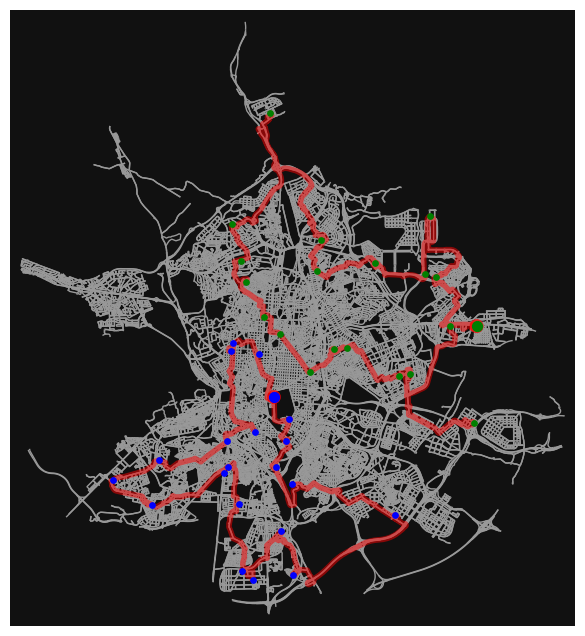

In [372]:
fig, ax = ox.plot_graph_route(G_Madrid, general_route1, node_size=0, show=False, close=False)
for store in cluster1:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='b', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central1]['x'], G_Madrid.nodes[central1]['y'], c='b', s=50, zorder=3)

ox.plot_graph_route(G_Madrid, general_route2, ax=ax, node_size=0, show=False, close=False)
for store in cluster2:
    ax.scatter(G_Madrid.nodes[store]['x'], G_Madrid.nodes[store]['y'], c='g', s=15, zorder=3)
ax.scatter(G_Madrid.nodes[central2]['x'], G_Madrid.nodes[central2]['y'], c='g', s=50, zorder=3)

plt.show()

# TASK 9. Trial to solve best route problem with traffic

In [4]:
central1 = 171951
central2 = 1313229645

cluster1 = [4011769549, 303149012, 302687964, 819450330, 8712134559, 60030277, 27516704, 381229300, 1155636075, 306043161, 306094341, 1156807059, 31010887, 1838624715, 570093483, 3884052068, 26085371, 2689156081, 26025849, 2297581623]
cluster2 = [256155004, 311839773, 31035711, 262519295, 59609603, 21991324, 9372946343, 1377881557, 254498236, 2604982681, 26202196, 285912200, 3538151707, 308726077, 25552369, 430969600, 1156936773, 98766712, 1594900062, 364653409]

cluster1.append(central1)
cluster2.append(central2)


## Preparing the data for modified distance matrix

In [8]:
G_Madrid = ox.graph_from_place('Madrid, Spain', network_type='drive')

In [13]:
with open('madrid_codigos_postales.json', 'r') as f:
    zones_data = json.load(f)

zones = {}
for feature in zones_data['features']:
    zone_code = feature['properties']['MOVEMENT_ID']
    zone_polygon = shape(feature['geometry'])
    zones[zone_code] = zone_polygon

In [17]:


def find_zones(G_Madrid, stores,zones):
    store_coordinates = {}
    for store in stores:
        x = G_Madrid.nodes[store]['x']
        y = G_Madrid.nodes[store]['y']
        store_coordinates[store] = (x, y)

    stores_in_zones = {}
    for store_id, coordinates in store_coordinates.items():
        point = Point(coordinates)
        for zone_code, zone_polygon in zones.items():
            if zone_polygon.contains(point):
                if zone_code not in stores_in_zones:
                    stores_in_zones[zone_code] = []
                stores_in_zones[zone_code].append(store_id)
                break
    
    list_stores_zones = dict()
    for zone_code, stores_in_zone in stores_in_zones.items():
        for store in stores_in_zone:
            list_stores_zones[store] = zone_code
    return list_stores_zones


In [18]:
stores_in_zones1 = find_zones(G_Madrid, cluster1,zones)
stores_in_zones1

{4011769549: '45',
 3884052068: '45',
 303149012: '41',
 306094341: '41',
 302687964: '47',
 819450330: '51',
 8712134559: '25',
 60030277: '10',
 27516704: '3',
 381229300: '21',
 1156807059: '21',
 570093483: '21',
 1155636075: '26',
 306043161: '53',
 31010887: '14',
 171951: '14',
 1838624715: '54',
 26085371: '44',
 2689156081: '19',
 26025849: '15',
 2297581623: '12'}

In [23]:
zones_cluster1 = stores_in_zones1.values()
zones_cluster1 = list(set(zones_cluster1))
zones_cluster1

['41',
 '21',
 '10',
 '53',
 '54',
 '51',
 '15',
 '12',
 '14',
 '26',
 '44',
 '3',
 '19',
 '47',
 '45',
 '25']

In [20]:
distance_matrix1 = create_distance_matrix(G_Madrid, cluster1)


In [21]:
distance_matrix1

[[0,
  5531.723999999999,
  7036.573000000001,
  8472.501000000002,
  4527.477,
  6457.299,
  7662.719999999995,
  8106.2390000000005,
  3159.4589999999994,
  3958.8300000000004,
  4295.737,
  8165.062999999998,
  3461.6759999999995,
  7887.395000000003,
  7329.1539999999995,
  2285.604,
  9519.789000000004,
  3620.1169999999993,
  6998.857999999999,
  2430.0610000000006,
  4256.814],
 [5331.842000000001,
  0,
  8758.285000000005,
  7054.460999999999,
  5293.41,
  10204.587000000003,
  11390.586000000001,
  3453.242999999999,
  5417.653000000001,
  6332.792999999997,
  3516.3050000000007,
  3220.21,
  7393.151000000003,
  8286.956000000002,
  3201.511,
  6217.079000000001,
  10411.414000000004,
  7296.630000000003,
  10726.724,
  6157.927000000004,
  8004.102000000003],
 [7192.649000000001,
  8688.823000000004,
  0,
  14628.721000000001,
  4870.2210000000005,
  8998.001000000002,
  9160.023000000001,
  10398.905,
  4246.839000000002,
  10231.035999999996,
  5849.522,
  11322.162,
  833

In [22]:
import json
from shapely.geometry import Polygon
with open('madrid_codigos_postales.json', 'r') as file:
    geojson_data = json.load(file)
list_of_centres = []
for feature in geojson_data['features']:
    try:
        polygon_coords = feature['geometry']['coordinates'][0]
        polygon = Polygon(polygon_coords)
        centroid = polygon.centroid
        center_coords = centroid.x, centroid.y
        center_c = ox.nearest_nodes(G_Madrid, centroid.x, centroid.y)
        list_of_centres.append((center_c))
    except:
        continue
list_of_centres

[25552423,
 143755802,
 33131380,
 25906297,
 1504976877,
 143500436,
 150987792,
 2601286044,
 1957490858,
 141887738,
 1175067581,
 26310539,
 345198395,
 26486624,
 25935134,
 102518454,
 101044604,
 307644818,
 302000362,
 264208242,
 315274929,
 31221572,
 264338169,
 307997220,
 301999574,
 315749486,
 100962502,
 25531678,
 26204784,
 306102626,
 316773736,
 1838819849,
 254968465,
 77919823,
 43494610,
 102359166,
 24969395,
 4573249413,
 93876097,
 330271561,
 315894604,
 255968715,
 221254528,
 747482570,
 162069203,
 98987563,
 1094644004,
 259057658,
 21702379,
 24977027,
 296504808,
 443154219,
 307706711,
 1420240558,
 1433108756,
 32014661,
 2281943567,
 2281943552,
 364653589,
 2281943567,
 387703059,
 364653589,
 2281943567,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 387703059,
 319165153,
 319165153,
 319165153,
 319165153,
 319165150,
 1275932145,
 266158546,
 319165153,
 266158546,
 319165150,
 319165

In [44]:
general_route_zones_distances = []
for i in range(len(zones_cluster1)):
    for j in range(len(zones_cluster1)):
        source = list_of_centres[int(zones_cluster1[i])]
        destination = list_of_centres[int(zones_cluster1[j])]
        try:
            path_l = nx.shortest_path_length(G_Madrid, int(source), int(destination), weight='length', method='dijkstra')
        except:
            connected_nodes_d = list(G_Madrid.neighbors(destination))
            connected_nodes_s = list(G_Madrid.neighbors(source))
            for node in connected_nodes_d:
                try:
                    path_l = nx.shortest_path_length(G_Madrid, int(source), int(node), weight='length', method='dijkstra')
                    path_l += nx.shortest_path_length(G_Madrid, int(node), int(destination), weight='length', method='dijkstra')
                    break
                except:
                    continue
        if path_l == 0:
            path_l = 7000
        
        general_route_zones_distances.append([int(zones_cluster1[i]), int(zones_cluster1[j]), round(path_l)])
    
general_route_zones_distances = pd.DataFrame(general_route_zones_distances, columns=['sourceid', 'dstid', 'length'])
general_route_zones_distances

sourceid  dstid  length
0          41     41    7000
1          41     21    5200
2          41     10   19266
3          41     53   21388
4          41     54    6414
..        ...    ...     ...
251        25      3    6393
252        25     19    9451
253        25     47   20344
254        25     45    9954
255        25     25    7000

[256 rows x 3 columns]

In [45]:
general_route_zones_distances.to_csv("general_route_zones_distances.csv")

In [46]:

import pandas as pd
zones_cluster1 = [int(x) for x in zones_cluster1]
data = pd.read_csv('madrid-codigos_postales-2020-1-All-HourlyAggregate.csv')
filtered_data = data[(data['sourceid'].isin(zones_cluster1)) & (data['dstid'].isin(zones_cluster1))]
filtered_data.to_csv('filtered_data.csv', columns=['sourceid', 'dstid', 'hod', 'mean_travel_time'], index=False)



In [52]:
filtered_data = pd.read_csv('filtered_data.csv')
route_distances = pd.read_csv('general_route_zones_distances.csv')

merged_data = pd.merge(filtered_data, route_distances, on=['sourceid', 'dstid'], how='right')
merged_data.drop("Unnamed: 0", axis=1, inplace=True)
merged_data['speed'] = merged_data['length'] / merged_data['mean_travel_time']
merged_data.drop("mean_travel_time", axis=1, inplace=True)
merged_data.drop("length", axis=1, inplace=True)
merged_data.to_csv('merged_data.csv', index=False)

In [53]:
merged_data

sourceid  dstid  hod      speed
0           41     41   23  22.384241
1           41     21    2  25.784698
2           41     21    4  26.590305
3           41     21    0  26.349126
4           41     21    5  24.127691
...        ...    ...  ...        ...
5714        25     45   17  14.281410
5715        25     45   16  14.798626
5716        25     45    1  16.681750
5717        25     45   11  14.317770
5718        25     25   23  23.167301

[5719 rows x 4 columns]

In [55]:
print(cluster1)

[4011769549, 303149012, 302687964, 819450330, 8712134559, 60030277, 27516704, 381229300, 1155636075, 306043161, 306094341, 1156807059, 31010887, 1838624715, 570093483, 3884052068, 26085371, 2689156081, 26025849, 2297581623, 171951]


In [56]:
print(distance_matrix1)

[[0, 5531.723999999999, 7036.573000000001, 8472.501000000002, 4527.477, 6457.299, 7662.719999999995, 8106.2390000000005, 3159.4589999999994, 3958.8300000000004, 4295.737, 8165.062999999998, 3461.6759999999995, 7887.395000000003, 7329.1539999999995, 2285.604, 9519.789000000004, 3620.1169999999993, 6998.857999999999, 2430.0610000000006, 4256.814], [5331.842000000001, 0, 8758.285000000005, 7054.460999999999, 5293.41, 10204.587000000003, 11390.586000000001, 3453.242999999999, 5417.653000000001, 6332.792999999997, 3516.3050000000007, 3220.21, 7393.151000000003, 8286.956000000002, 3201.511, 6217.079000000001, 10411.414000000004, 7296.630000000003, 10726.724, 6157.927000000004, 8004.102000000003], [7192.649000000001, 8688.823000000004, 0, 14628.721000000001, 4870.2210000000005, 8998.001000000002, 9160.023000000001, 10398.905, 4246.839000000002, 10231.035999999996, 5849.522, 11322.162, 8333.033, 3076.7680000000005, 9471.841000000002, 8350.375000000004, 2675.8259999999996, 5105.423999999999, 84

In [72]:
import csv
rows_list = []
with open('merged_data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    for row in csv_reader:
        cur_row = [int(row[0]), int(row[1]), int(row[2]), float(row[3])]
        rows_list.append(cur_row)
        


In [73]:
rows_list

[[41, 41, 23, 22.38424149398823],
 [41, 21, 2, 25.78469777359052],
 [41, 21, 4, 26.590304765800777],
 [41, 21, 0, 26.349125918419052],
 [41, 21, 5, 24.12769116555308],
 [41, 21, 21, 24.35026925778506],
 [41, 21, 17, 23.514515691417202],
 [41, 21, 20, 23.283929610889714],
 [41, 21, 16, 23.05782192266761],
 [41, 21, 19, 21.961314300194275],
 [41, 21, 13, 23.990772779700116],
 [41, 21, 23, 23.515579071134628],
 [41, 21, 12, 24.636376557540153],
 [41, 21, 9, 25.36709107761354],
 [41, 21, 15, 24.204058834481476],
 [41, 21, 18, 21.034747785283766],
 [41, 21, 8, 25.00480861704174],
 [41, 21, 10, 27.641930682543055],
 [41, 21, 11, 25.644819253341222],
 [41, 21, 6, 25.874508633129324],
 [41, 21, 14, 22.65893938733714],
 [41, 21, 3, 26.154310431546122],
 [41, 21, 22, 24.855408441279096],
 [41, 21, 1, 24.937655860349125],
 [41, 21, 7, 23.835716905023837],
 [41, 10, 4, 15.744440903184682],
 [41, 10, 16, 15.002219263204616],
 [41, 10, 10, 14.114285714285714],
 [41, 10, 2, 16.616785834418636],
 [41,

# Creating the 3D matrix which will contain a list {hour:time for each hour for each distance and speed}  instead of distance from A to B

In [107]:
def find_row(rows_list, indices, values):
    found_rows = []
    for row in rows_list:
        if all(row[idx] == val for idx, val in zip(indices, values)):
            found_rows.append(row[2:])
    return sorted(found_rows, key=lambda x: int(x[0]))

def create_speed_matrix(G, stores, list_stores_in_zones1, rows_list):
    distance_matrix = [[float('inf') for _ in range(len(stores))] for _ in range(len(stores))]
    
    for i in range(len(stores)):
        for j in range(len(stores)):
            if i != j:
                l = nx.shortest_path_length(G, stores[i], stores[j], weight='length', method='dijkstra')
                sorce = stores[i]
                destination = stores[j]
                sorse_z = list_stores_in_zones1[sorce]
                destination_z = list_stores_in_zones1[destination]
                speeds = find_row(rows_list, (0,1), [sorse_z, destination_z])
                l /=1000
                for k in range(len(speeds)):
                    time = l / speeds[k][1]
                    speeds[k][1] = round(time,2)
                speeds = dict(speeds)
                if len(speeds) != 24:
                    for k in range(24):
                        if k not in speeds:
                            speeds[k] = 0
                distance_matrix[i][j] = speeds
            else:
                distance_matrix[i][j] = {x:y for x, y in zip(range(24), [0]*24)}
    return distance_matrix

In [75]:
list_stores_in_zones1 = {4011769549: 45,
 3884052068: 45,
 303149012: 41,
 306094341: 41,
 302687964: 47,
 819450330: 51,
 8712134559: 25,
 60030277: 10,
 27516704: 3,
 381229300: 21,
 1156807059: 21,
 570093483: 21,
 1155636075: 26,
 306043161: 53,
 31010887: 14,
 171951: 14,
 1838624715: 54,
 26085371: 44,
 2689156081: 19,
 26025849: 15,
 2297581623: 12}



## Times matrix: for each A and for each B:

## dictionary {hour:time} 

In [108]:
speed_matrix1 = create_speed_matrix(G_Madrid, cluster1, list_stores_in_zones1, rows_list)

speed_matrix1 

[[{0: 0,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0},
  {0: 0.13,
   1: 0.12,
   2: 0.13,
   3: 0.12,
   4: 0.12,
   5: 0.13,
   6: 0.13,
   7: 0.13,
   8: 0.14,
   9: 0.14,
   10: 0.13,
   11: 0.12,
   12: 0.12,
   13: 0.13,
   14: 0.13,
   15: 0.13,
   16: 0.13,
   17: 0.14,
   18: 0.14,
   19: 0.14,
   20: 0.14,
   21: 0.14,
   22: 0.12,
   23: 0.13},
  {0: 0.36,
   1: 0.36,
   2: 0.37,
   3: 0.34,
   4: 0.35,
   5: 0.36,
   6: 0.34,
   7: 0.45,
   8: 0.41,
   9: 0.38,
   10: 0.36,
   11: 0.37,
   12: 0.38,
   13: 0.39,
   14: 0.39,
   15: 0.39,
   16: 0.41,
   17: 0.39,
   18: 0.42,
   19: 0.42,
   20: 0.39,
   21: 0.38,
   22: 0.37,
   23: 0.37},
  {0: 0.38,
   1: 0.36,
   2: 0.39,
   3: 0.39,
   4: 0.38,
   5: 0.39,
   6: 0.4,
   7: 0.42,
   8: 0.38,
   9: 0.37,
   10: 0.44,
   11: 0.43,
   12: 0.41,
   13

In [109]:
df_speed_matrix1 = pd.DataFrame(speed_matrix1)
df_speed_matrix1.to_csv('speed_matrix1.csv')

## Next step is to iterate over 3D matrix and solve TSP for it considering starting time(9 AM) and traffic data 

### Basic Constraints:
- $x_{ii} = 0$ for all $i \in \{1, 2, \dots, n\}$ (No city connects to itself).

- $\sum_{j=1, j\neq i}^{n} x_{ij} = 1$ for all $i \in \{1, 2, \dots, n\}$ (Each city is left exactly once).

- $\sum_{i=1, i\neq j}^{n} x_{ij} = 1$ for all $j \in \{1, 2, \dots, n\}$ (Each city is visited exactly once).

- $u_i + x_{ij} * time_{ijhour} \leq u_j + (n - 1)(1 - x_{ij}) + time_{ijhour}$ for all $i,j \in \{1, 2, \dots, n\}, j \neq 1$ (Subtour elimination)

- $u_1 = 0$ (Start from city 1)

### Additional - for time range and traffic tracking


In [180]:
import pulp

time_matrix = speed_matrix1 

problem = pulp.LpProblem("Traveling Salesman Problem 3D", pulp.LpMinimize)
n = 21
nodes = range(n)
start_time = 9  
current_time = start_time 

x = pulp.LpVariable.dicts("x", ((i, j) for i in nodes for j in nodes), cat='Binary')
u = pulp.LpVariable.dicts("u", nodes, lowBound=0, cat='Continuous')

problem += pulp.lpSum(time_matrix[i][j][hour] * x[i, j] for i in nodes for j in nodes for hour in range(9, 24))

for i in nodes:
    problem += x[i, i] == 0

for i in nodes:
    problem += pulp.lpSum(x[i, j] for j in nodes) == 1

for j in nodes:
    problem += pulp.lpSum(x[i, j] for i in nodes) == 1

for i in nodes:
    for j in nodes:
        if j != i:
            for hour in range(9, 24):
                problem += u[i] + x[i, j] * time_matrix[i][j][hour] <= u[j] + (n - 1) * (1 - x[i, j]) + time_matrix[i][j][hour]


problem += u[1] == start_time

problem.solve()

list_routes = []
for i in nodes:
    for j in nodes:
        if pulp.value(x[i, j]) > 0:
            print(i, "->", j)
            list_routes.append([i, j])
            current_time += time_matrix[i][j][int(current_time)]

print("Final Time:", current_time)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/c85124134dc1474489a5b01609ce3a0b-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/7b/w88rg4wj6518tfwbvq_qvtjr0000gn/T/c85124134dc1474489a5b01609ce3a0b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6369 COLUMNS
At line 27476 RHS
At line 33841 BOUNDS
At line 34283 ENDATA
Problem MODEL has 6364 rows, 462 columns and 19804 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 15.18 - 0.01 seconds
Cgl0002I 21 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 3208 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2898 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 210 strengthened rows, 0 substitutions


In [181]:
list_routes

[[0, 15],
 [1, 10],
 [2, 17],
 [3, 9],
 [4, 13],
 [5, 6],
 [6, 18],
 [7, 14],
 [8, 4],
 [9, 3],
 [10, 1],
 [11, 7],
 [12, 20],
 [13, 16],
 [14, 11],
 [15, 19],
 [16, 2],
 [17, 8],
 [18, 5],
 [19, 0],
 [20, 12]]

In [182]:
general_route1 = []
for route in list_routes:
    general_route1.append([cluster1[route[0]], cluster1[route[1]]])
    
general_route1

[[4011769549, 3884052068],
 [303149012, 306094341],
 [302687964, 2689156081],
 [819450330, 306043161],
 [8712134559, 1838624715],
 [60030277, 27516704],
 [27516704, 26025849],
 [381229300, 570093483],
 [1155636075, 8712134559],
 [306043161, 819450330],
 [306094341, 303149012],
 [1156807059, 381229300],
 [31010887, 171951],
 [1838624715, 26085371],
 [570093483, 1156807059],
 [3884052068, 2297581623],
 [26085371, 302687964],
 [2689156081, 1155636075],
 [26025849, 60030277],
 [2297581623, 4011769549],
 [171951, 31010887]]

### PS. works not properly, but I tried to implement the idea of finding the shortest route (by time) on the surface of 3d matrix, where additional pointer iterates over the times (start = 9AM). 

### On each step theoretically I have a time that I would spend to get to any location on the same/next hour(depends on duration of the road)

### therefore, the resulting route would have a starting point in (0,0,9) and end point in (0,0,t), where t- time of the end of the road

### the main part of the route will look like connected edges between points in the cube which are always moving up or remaining on the same level (if the hour hasn't changed yet)